In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [10]:
covid = pd.read_csv('/work/covid.csv')
covid

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,13-05-2020,03-05-2020,9999-99-99,97,2,58,97,...,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,07-04-2020,06-04-2020,9999-99-99,97,2,48,2,...,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,14-05-2020,01-05-2020,9999-99-99,2,1,49,2,...,2,2,2,2,1,2,2,99,3,2
566600,16fb02,1,1,31-05-2020,29-05-2020,9999-99-99,97,1,43,2,...,2,2,2,2,2,2,2,2,3,97


In [9]:
_deepnote_run_altair(covid, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"id","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"sex","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

# Análise Exploratória dos Dados

In [12]:
covid_1 = covid.drop(columns='id')
covid_1.head()

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,...,2,2,2,2,2,2,2,2,1,97
1,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,...,2,2,2,2,2,2,2,99,1,97
2,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,...,2,2,2,2,1,2,2,99,1,2
3,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,...,2,2,2,2,2,2,2,99,1,2
4,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,...,2,1,2,1,2,2,2,99,1,2


In [68]:
# convertendo dados de para datetime 
covid_1['entry_date'] = pd.to_datetime(covid_1['entry_date'], format= '%d-%m-%Y')
covid_1['date_symptoms'] = pd.to_datetime(covid_1['date_symptoms'], format= '%d-%m-%Y')
covid_1['date_died'] = pd.to_datetime(covid_1['date_died'], format= '%d-%m-%Y')

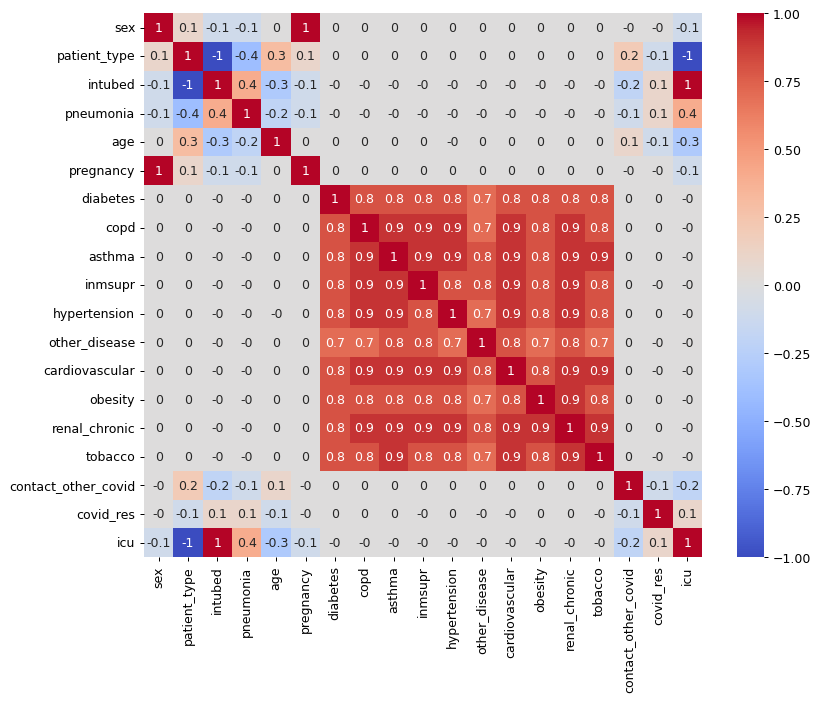

In [20]:
plt.figure(figsize=(10, 8), dpi= 90)
sns.heatmap(covid_1.corr().round(1),
                annot=True, center=0, vmin=-1, vmax=1,
                cmap = "coolwarm")
plt.show()

In [72]:
# data: '9999-99-99' - nao morreu?
covid_1['died'] = ~(pd.isnull(covid_1['date_died']))
covid_1

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died
0,2,1,2020-05-04,2020-05-02,NaT,97,2,27,97,2,...,2,2,2,2,2,2,2,1,97,False
1,2,1,2020-03-19,2020-03-17,NaT,97,2,24,97,2,...,2,2,2,2,2,2,99,1,97,False
2,1,2,2020-04-06,2020-04-01,NaT,2,2,54,2,2,...,2,2,2,1,2,2,99,1,2,False
3,2,2,2020-04-17,2020-04-10,NaT,2,1,30,97,2,...,2,2,2,2,2,2,99,1,2,False
4,1,2,2020-04-13,2020-04-13,2020-04-22,2,2,60,2,1,...,1,2,1,2,2,2,99,1,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,1,2020-05-13,2020-05-03,NaT,97,2,58,97,1,...,2,2,2,2,2,2,2,3,97,False
566598,1,1,2020-04-07,2020-04-06,NaT,97,2,48,2,2,...,2,2,2,2,2,2,2,3,97,False
566599,1,2,2020-05-14,2020-05-01,NaT,2,1,49,2,2,...,2,2,2,1,2,2,99,3,2,False
566600,1,1,2020-05-31,2020-05-29,NaT,97,1,43,2,2,...,2,2,2,2,2,2,2,3,97,False


In [75]:
covid_1['date_symptoms_day'] = covid_1['date_symptoms'].dt.date
covid_1['date_died_day'] = covid_1['date_died'].dt.date

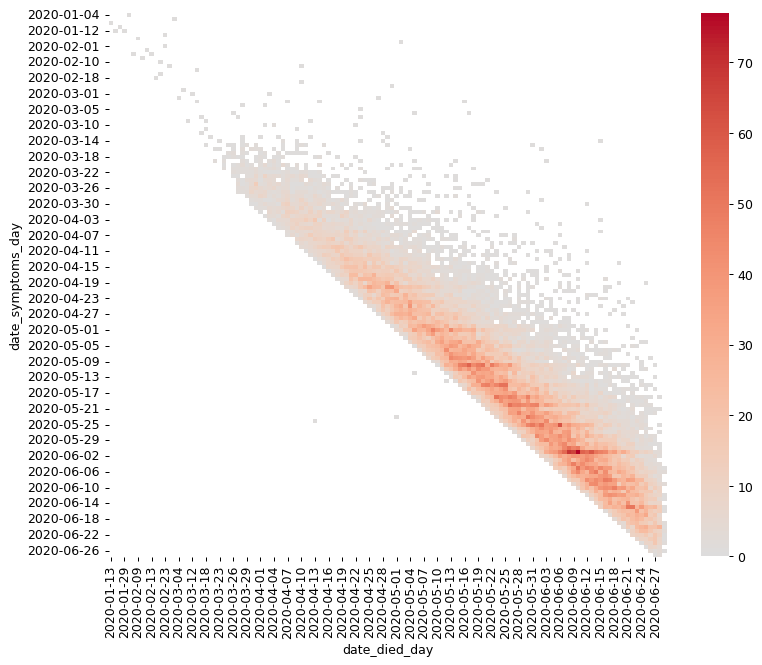

In [90]:
dates = covid_1.groupby(['date_symptoms_day', 'date_died_day']).size()
dates = dates.reset_index()
dates.columns = ['date_symptoms_day', 'date_died_day', 'count']


dates = dates.pivot('date_symptoms_day', 'date_died_day', 'count')
plt.figure(figsize=(10, 8), dpi= 90)

sns.heatmap(dates, center=0, vmin=0,
                cmap = "coolwarm")
plt.show()

# ax = sns.heatmap(flights, annot=True, fmt="d")

In [44]:
covid_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   sex                  566602 non-null  int64         
 1   patient_type         566602 non-null  int64         
 2   entry_date           566602 non-null  datetime64[ns]
 3   date_symptoms        566602 non-null  datetime64[ns]
 4   date_died            36176 non-null   object        
 5   intubed              566602 non-null  int64         
 6   pneumonia            566602 non-null  int64         
 7   age                  566602 non-null  int64         
 8   pregnancy            566602 non-null  int64         
 9   diabetes             566602 non-null  int64         
 10  copd                 566602 non-null  int64         
 11  asthma               566602 non-null  int64         
 12  inmsupr              566602 non-null  int64         
 13  hypertension  

In [42]:
# convertendo a data da morte

covid_1['date_died'] = covid_1['date_died'].apply(lambda x: x if x != '9999-99-99' else np.nan)

In [67]:
np.sort(covid_1['age'].unique())


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117,
       118, 119, 120])

In [88]:
covid_1.apply(lambda x: x.unique())

covid_1[['pregnancy','diabetes', 'copd', 'asthma', 'inmspr',]].apply()

sex                                                               [2, 1]
patient_type                                                      [1, 2]
entry_date             [2020-05-04T00:00:00.000000000, 2020-03-19T00:...
date_symptoms          [2020-05-02T00:00:00.000000000, 2020-03-17T00:...
date_died              [NaT, 2020-04-22T00:00:00.000000000, 2020-04-2...
intubed                                                   [97, 2, 1, 99]
pneumonia                                                     [2, 1, 99]
age                    [27, 24, 54, 30, 60, 47, 63, 56, 41, 39, 46, 4...
pregnancy                                                 [97, 2, 1, 98]
diabetes                                                      [2, 1, 98]
copd                                                          [2, 1, 98]
asthma                                                        [2, 1, 98]
inmsupr                                                       [2, 1, 98]
hypertension                                       

In [94]:
covid_1[covid_1.loc[:, 'diabetes'] == 98]

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died,date_symptoms_day,date_died_day
1732,2,1,2020-05-13,2020-05-06,NaT,97,2,41,97,98,...,2,2,2,2,99,1,97,False,2020-05-06,NaT
2097,2,2,2020-05-08,2020-05-02,2020-05-15,2,1,49,97,98,...,2,1,2,2,99,1,2,True,2020-05-02,2020-05-15
2621,1,2,2020-05-27,2020-05-23,2020-06-06,2,2,58,2,98,...,98,98,98,98,99,1,2,True,2020-05-23,2020-06-06
2889,2,2,2020-06-04,2020-05-20,NaT,2,2,45,97,98,...,98,2,98,98,99,1,2,False,2020-05-20,NaT
3531,2,2,2020-05-25,2020-05-16,NaT,2,1,41,97,98,...,98,98,98,98,99,1,2,False,2020-05-16,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565774,1,1,2020-06-27,2020-06-26,NaT,97,2,53,2,98,...,98,98,98,98,2,3,97,False,2020-06-26,NaT
566005,2,1,2020-06-08,2020-05-30,NaT,97,1,47,97,98,...,98,98,98,98,2,3,97,False,2020-05-30,NaT
566222,1,1,2020-06-24,2020-06-19,NaT,97,2,76,2,98,...,98,98,98,98,2,3,97,False,2020-06-19,NaT
566370,1,1,2020-06-25,2020-06-19,NaT,97,2,21,98,98,...,98,98,98,98,2,3,97,False,2020-06-19,NaT


In [95]:
df = covid_1[covid_1.loc[:, 'diabetes'] == 98]
df['patient_type'].value_counts()

1    1312
2     669
Name: patient_type, dtype: int64

In [128]:
df_sem_ignore = covid_1.drop(columns=['pregnancy'])
df_sem_ignore[(df_sem_ignore == 98)].any(axis=1).sum()


4011

In [123]:
covid_1[(covid_1['patient_type'] == 1) & (covid_1['died'] == True)]

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died,date_symptoms_day,date_died_day
24,1,1,2020-05-15,2020-05-06,2020-05-21,97,2,61,2,2,...,2,2,2,2,1,1,97,True,2020-05-06,2020-05-21
83,2,1,2020-06-15,2020-06-12,2020-06-19,97,1,78,97,1,...,2,2,2,2,1,1,97,True,2020-06-12,2020-06-19
291,1,1,2020-06-05,2020-05-30,2020-06-15,97,1,63,2,1,...,2,2,2,2,2,1,97,True,2020-05-30,2020-06-15
318,1,1,2020-05-29,2020-05-28,2020-06-05,97,2,76,2,2,...,2,2,2,2,1,1,97,True,2020-05-28,2020-06-05
391,2,1,2020-05-02,2020-04-26,2020-05-05,97,1,67,97,1,...,2,2,1,2,99,1,97,True,2020-04-26,2020-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565833,1,1,2020-06-15,2020-06-01,2020-06-22,97,2,59,2,2,...,2,2,2,2,99,3,97,True,2020-06-01,2020-06-22
565864,1,1,2020-06-18,2020-06-14,2020-06-18,97,2,65,2,2,...,2,2,2,2,99,3,97,True,2020-06-14,2020-06-18
565937,2,1,2020-05-11,2020-05-01,2020-05-14,97,1,52,97,1,...,2,2,2,2,2,3,97,True,2020-05-01,2020-05-14
566285,2,1,2020-05-10,2020-05-07,2020-05-15,97,1,41,97,2,...,2,1,2,2,1,3,97,True,2020-05-07,2020-05-15


In [119]:
covid_1['patient_type'].value_counts()

1    444689
2    121913
Name: patient_type, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=51a49710-5991-4d9e-8d88-f90d59cca546' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>